<p style="font-size: 20px; margin-bottom: 3px; margin-top: 3px;">By: Ayushman Anupam</p>  
<p style="font-size: 20px; margin-top: 3px;">GitHub Link: <a href="https://github.com/AyushmanGHub">https://github.com/AyushmanGHub</a></p>

### Topic for Project: Churn Prediction Model for Subscription Services
<div style="text-align: center;">
  <span style="color: #4A90E2; font-size: 35px; font-weight: bold;">ChurnPredict: Unlocking Subscription Insights</span>
  <hr style="border: 1px dashed grey; width: 80%;"/>
</div>


### -------------- Importing needed libraries --------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import RocCurveDisplay
import ipywidgets as widgets
from IPython.display import display


## -------------------- Data Importing and Preprocessing -----------------------

In [2]:
df = pd.read_csv(r"DataSet.csv")

print(df.shape)
print(df.columns)

(125000, 20)
Index(['customer_id', 'age', 'location', 'subscription_type', 'payment_plan',
       'num_subscription_pauses', 'payment_method',
       'customer_service_inquiries', 'signup_date', 'weekly_hours',
       'average_session_length', 'song_skip_rate', 'weekly_songs_played',
       'weekly_unique_songs', 'num_favorite_artists', 'num_platform_friends',
       'num_playlists_created', 'num_shared_playlists',
       'notifications_clicked', 'churned'],
      dtype='object')


In [3]:
data = df.copy()

# Encode categorical columns using one-hot encoding with 1s and 0s
categorical_columns = ['location', 'subscription_type', 'payment_plan', 'payment_method', 'customer_service_inquiries']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype=int)

# Convert 'signup_date' negative days to positive
data['signup_date'] = data['signup_date'].abs()
data.rename(columns={'signup_date': 'subscription_length'}, inplace=True)

print(data.shape)
data.head()


(125000, 42)


,customer_id,age,num_subscription_pauses,subscription_length,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,...,location_Wisconsin,subscription_type_Free,subscription_type_Premium,subscription_type_Student,payment_plan_Yearly,payment_method_Credit Card,payment_method_Debit Card,payment_method_Paypal,customer_service_inquiries_Low,customer_service_inquiries_Medium
0,1,32,2,1606,22.391362,105.394516,0.176873,169,109,18,...,0,1,0,0,1,0,0,1,0,1
1,2,64,3,2897,29.294210,52.501115,0.981811,55,163,44,...,0,1,0,0,0,0,0,1,1,0
2,3,51,2,348,15.400312,24.703696,0.048411,244,117,20,...,0,0,1,0,1,1,0,0,0,0
3,4,63,4,2894,22.842084,83.595480,0.035691,442,252,47,...,0,0,0,0,1,0,0,0,0,1
4,5,54,3,92,23.151163,52.578266,0.039738,243,230,41,...,0,0,0,0,0,0,0,1,0,0


### --------- Normalizing Data -----------

In [4]:
X = data.drop(columns=['churned','customer_id'])
y = data['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ------------ Exploratory Data Analysis --------------

#### ------------ Categorical Features Analysis ----------------------

C:\Users\ayush\AppData\Local\Temp\ipykernel_4588\3496529223.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')
C:\Users\ayush\AppData\Local\Temp\ipykernel_4588\3496529223.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')
C:\Users\ayush\AppData\Local\Temp\ipykernel_4588\3496529223.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')
C:\Users\ayush\AppData\Local\Temp\ipykernel_4588\3496529223.py:16: Future

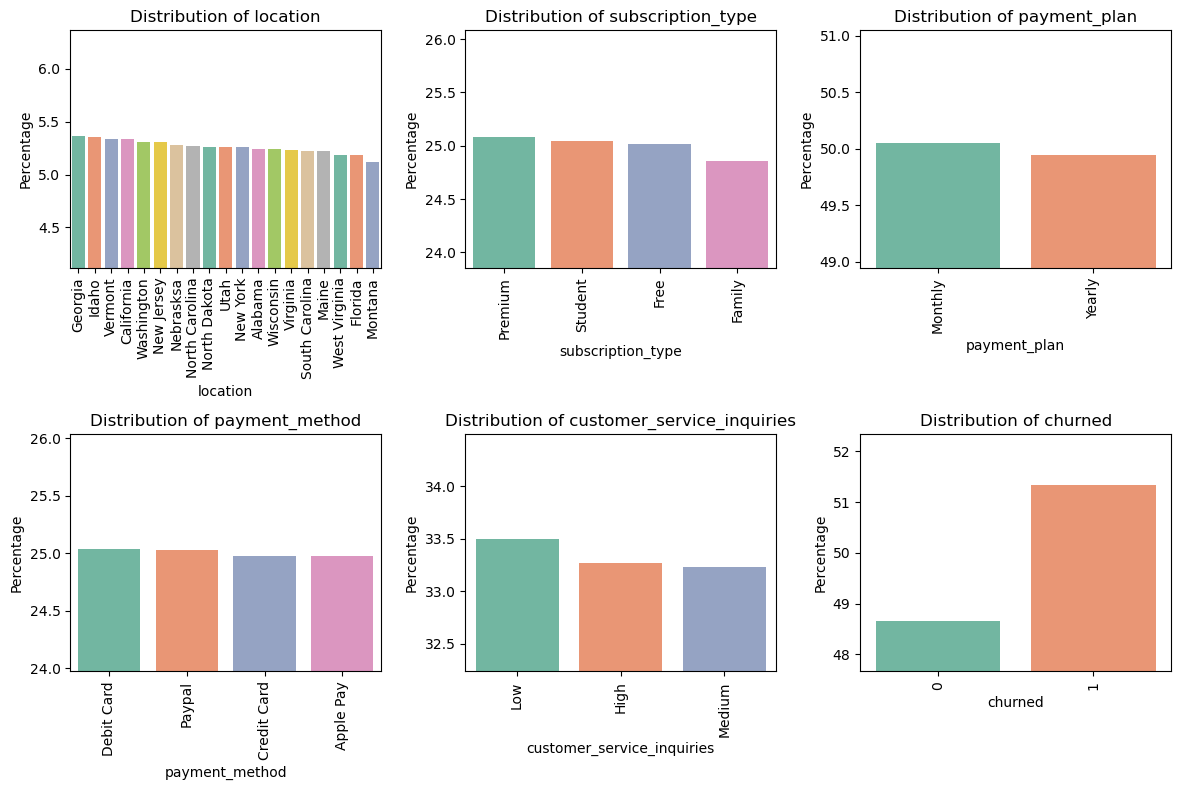

In [5]:
# Categorical columns (excluding 'churned' if it's already a column in the dataset)
categorical_cols = df.select_dtypes(include=['object']).columns

# Include 'churned' in the categorical columns for plotting if it exists
if 'churned' not in categorical_cols:
    categorical_cols = categorical_cols.append(pd.Index(['churned']))

plt.figure(figsize=(12, 8))
for idx, col in enumerate(categorical_cols):
    plt.subplot(2, 3, idx + 1)
    if col == 'churned':
        data = df[col].value_counts(normalize=True) * 100
        sns.barplot(x=data.index, y=data.values, palette='Set2')
    else:
        data = df[col].value_counts(normalize=True) * 100
        sns.barplot(x=data.index, y=data.values, palette='Set2')

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.xticks(rotation=90)
    plt.ylim(data.min() - 1, data.max() + 1)
plt.tight_layout()
plt.show()


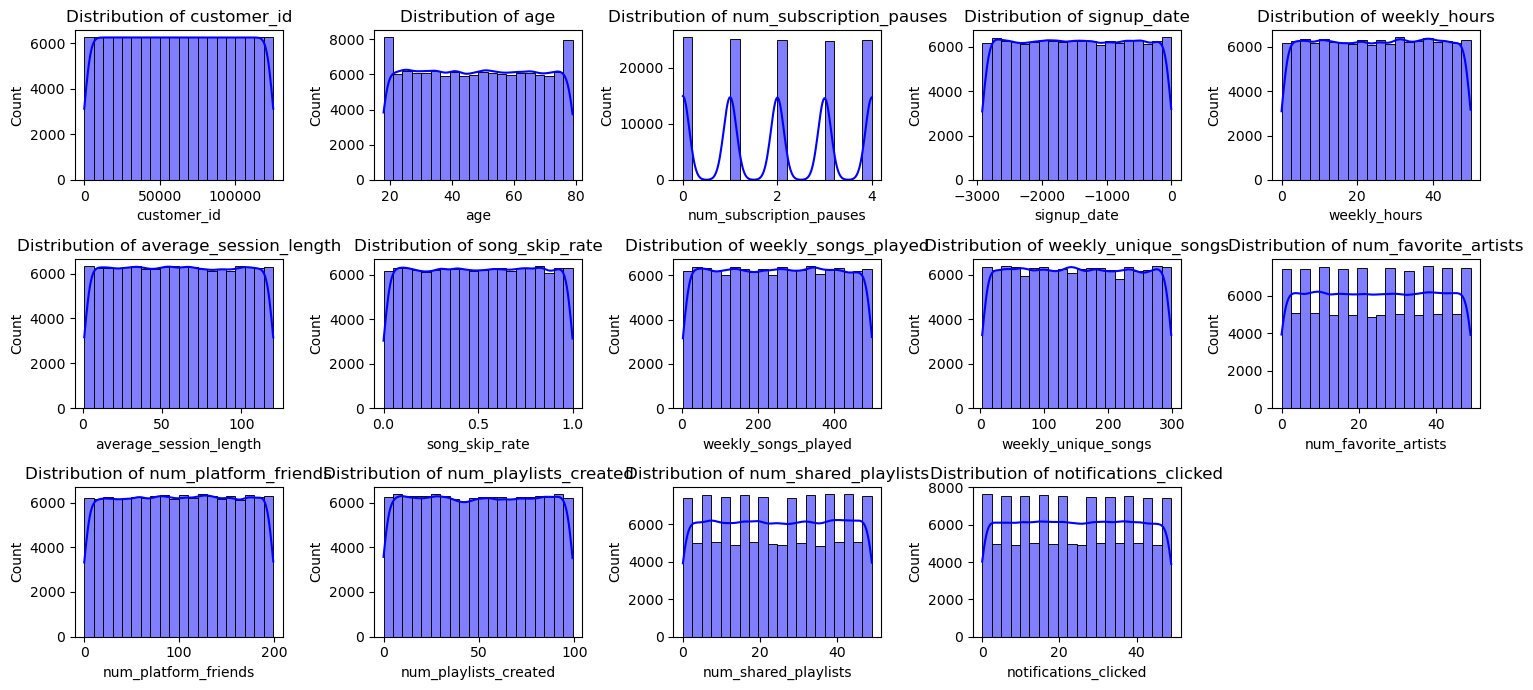

In [6]:
# Convert Index to a list before using remove
numerical_cols = list(df.select_dtypes(include=['float64', 'int64']).columns)
numerical_cols.remove("churned")
rows = 3
cols = 5

plt.figure(figsize=(15, 7)) 
for idx, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, idx + 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}",size = 12)    
plt.tight_layout()
plt.show()


## Logistic Regression on Normalized Data

In [7]:
logreg_n = LogisticRegression()
logreg_n.fit(X_train_scaled, y_train)

LogisticRegression()

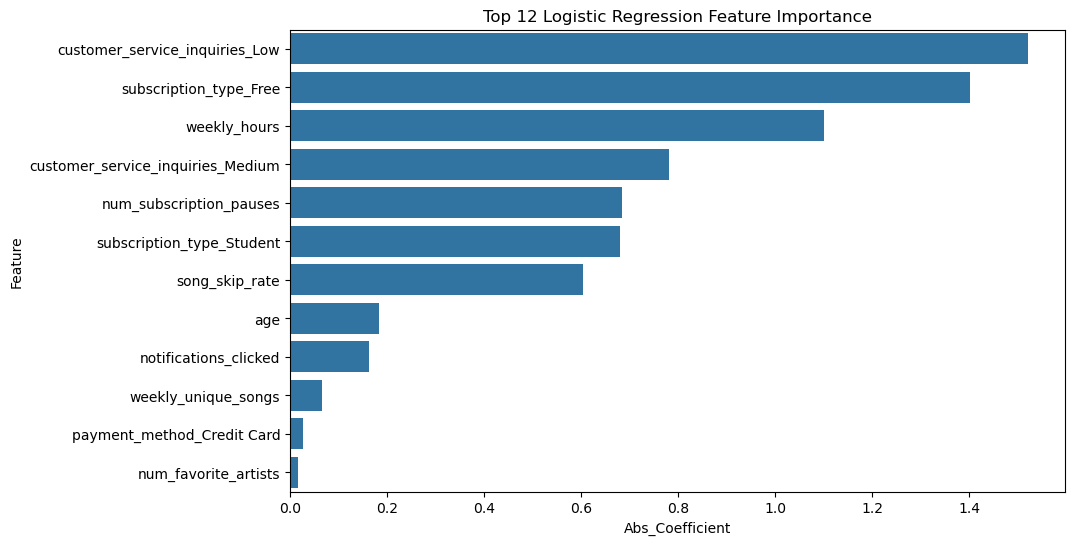

In [8]:
coefficients = logreg_n.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients to show the most important features
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Select the top 10 most important features
top_10_feature_importance = feature_importance.head(12)

plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=top_10_feature_importance)
plt.title('Top 12 Logistic Regression Feature Importance')
plt.show()


In [9]:
y_pred_logreg_normalized = logreg_n.predict(X_test_scaled)

logreg_accuracy_score_normalized = accuracy_score(y_test, y_pred_logreg_normalized)
logreg_precision_score_normalized = precision_score(y_test, y_pred_logreg_normalized)
logreg_recall_score_normalized = recall_score(y_test, y_pred_logreg_normalized)
logreg_roc_auc_score_normalized = roc_auc_score(y_test, y_pred_logreg_normalized)

print(f'Logistic Regression (normalized) Accuracy: {logreg_accuracy_score_normalized}')
print(f'Logistic Regression (normalized) Precision: {logreg_precision_score_normalized}')
print(f'Logistic Regression (normalized) Recall: {logreg_recall_score_normalized}')
print(f'Logistic Regression (normalized) AUC-ROC: {logreg_roc_auc_score_normalized}')

Logistic Regression (normalized) Accuracy: 0.805
Logistic Regression (normalized) Precision: 0.7549019607843137
Logistic Regression (normalized) Recall: 0.8461538461538461
Logistic Regression (normalized) AUC-ROC: 0.8083980239943543


## Random forest Classifier on Normalized Data

In [10]:
rf_n = RandomForestClassifier(random_state=42,n_estimators =  500, max_depth = 11)
rf_n.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=11, n_estimators=500, random_state=42)

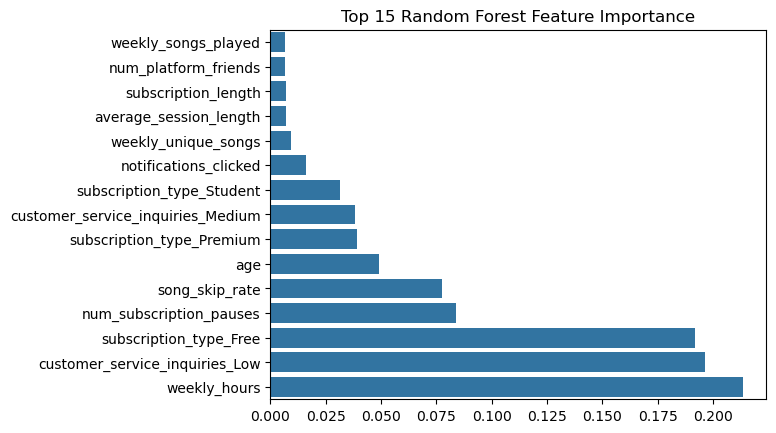

In [11]:
# Get feature importance and sort it in descending order
feature_importance_rf = rf_n.feature_importances_
sorted_idx_rf = feature_importance_rf.argsort()  

# Get top 12 features
top_12_idx = sorted_idx_rf[-15:]  
top_12_features = [X.columns[i] for i in top_12_idx]  
top_12_importance = feature_importance_rf[top_12_idx]  

sns.barplot(x=top_12_importance, y=top_12_features)
plt.title('Top 15 Random Forest Feature Importance')
plt.show()


In [12]:
y_pred_rf_normalized = rf_n.predict(X_test_scaled)

rf_accuracy_score_normalized = accuracy_score(y_test, y_pred_rf_normalized)
rf_precision_score_normalized = precision_score(y_test, y_pred_rf_normalized)
rf_recall_score_normalized = recall_score(y_test, y_pred_rf_normalized)
rf_roc_auc_score_normalized = roc_auc_score(y_test, y_pred_rf_normalized)


print(f'Random Forest (normalized) Accuracy: {rf_accuracy_score_normalized}')
print(f'Random Forest (normalized) Precision: {rf_precision_score_normalized}')
print(f'Random Forest (normalized) Recall: {rf_recall_score_normalized}')
print(f'Random Forest (normalized) AUC-ROC: {rf_roc_auc_score_normalized}')

Random Forest (normalized) Accuracy: 0.855
Random Forest (normalized) Precision: 0.81
Random Forest (normalized) Recall: 0.8901098901098901
Random Forest (normalized) AUC-ROC: 0.8578989817521926


## XGBoost Classifier on normalized Data

In [22]:
xgb_n = XGBClassifier(random_state=42)
xgb_n.fit(X_train_scaled, y_train)
y_pred_xgb_normalized = xgb_n.predict(X_test_scaled)

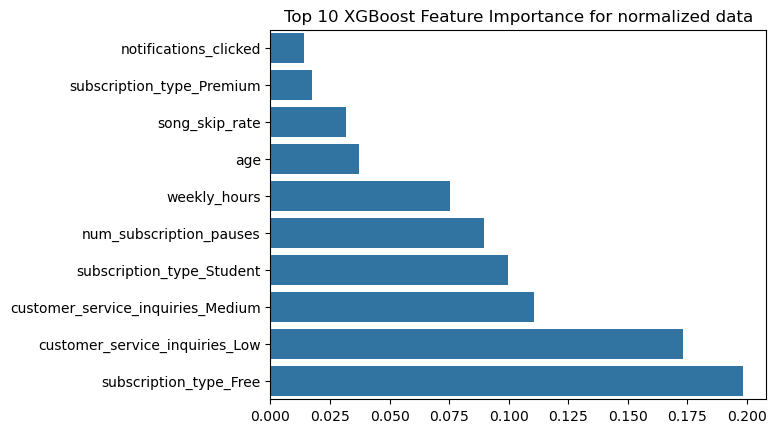

In [23]:
# Get feature importance and sort it in descending order
feature_importance = xgb_n.feature_importances_
sorted_idx = feature_importance.argsort() 

# Get top 10 features
top_10_idx = sorted_idx[-10:]  
top_10_features = [X.columns[i] for i in top_10_idx] 
top_10_importance = feature_importance[top_10_idx]  

sns.barplot(x=top_10_importance, y=top_10_features)
plt.title('Top 10 XGBoost Feature Importance for normalized data')
plt.show()


In [25]:
# Evaluate XGBoost
xgb_accuracy_score_normalized = accuracy_score(y_test, y_pred_xgb_normalized)
xgb_precision_score_normalized = precision_score(y_test, y_pred_xgb_normalized)
xgb_recall_score_normalized = recall_score(y_test, y_pred_xgb_normalized)
xgb_roc_auc_score_normalized = roc_auc_score(y_test, y_pred_xgb_normalized)

print(f'XGBoost (normalized) Accuracy: {xgb_accuracy_score_normalized}')
print(f'XGBoost (normalized) Precision: {xgb_precision_score_normalized}')
print(f'XGBoost (normalized) Recall: {xgb_recall_score_normalized}')
print(f'XGBoost (normalized) AUC-ROC: {xgb_roc_auc_score_normalized}')

XGBoost (normalized) Accuracy: 0.87
XGBoost (normalized) Precision: 0.8282828282828283
XGBoost (normalized) Recall: 0.9010989010989011
XGBoost (normalized) AUC-ROC: 0.8725677991733037


# ---------------------------------------------------

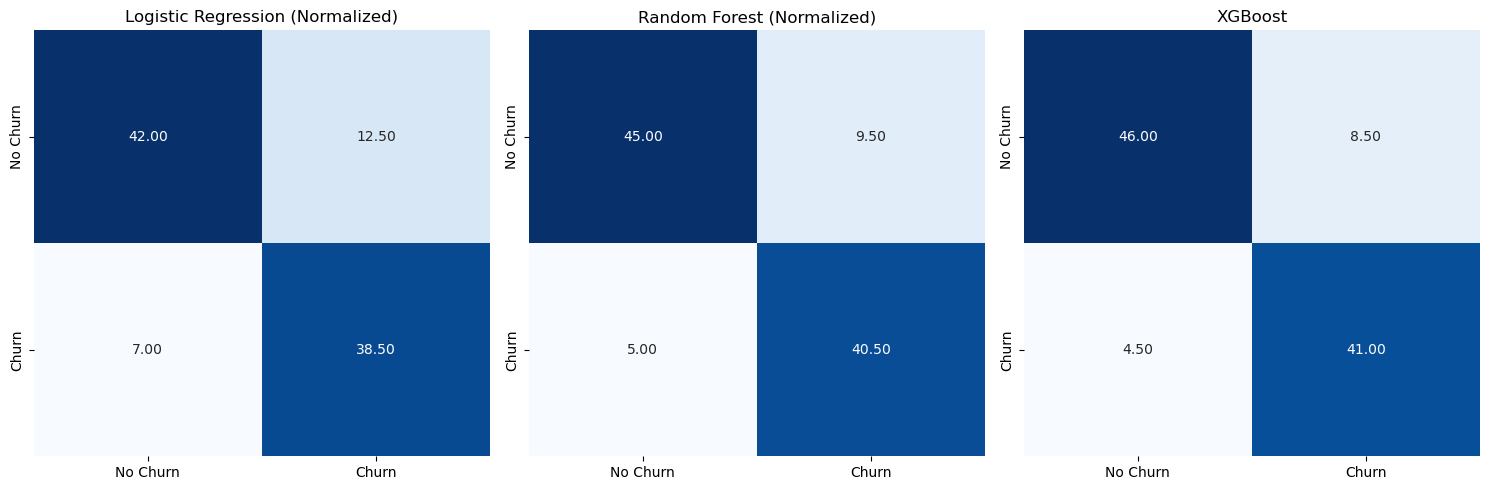

In [26]:
# Create confusion matrices for normalized data
cm_log_reg_scaled = confusion_matrix(y_test, y_pred_logreg_normalized)
cm_rf_scaled = confusion_matrix(y_test, y_pred_rf_normalized)
cm_xgb_scaled = confusion_matrix(y_test, y_pred_xgb_normalized)

# Normalize the confusion matrices to show percentages
n = y_test.shape[0]
cm_log_reg_scaled_percentage = cm_log_reg_scaled.astype('float') / n * 100
cm_rf_scaled_percentage = cm_rf_scaled.astype('float') / n * 100
cm_xgb_scaled_percentage = cm_xgb_scaled.astype('float') / n * 100

# Plot confusion matrices in a single row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Logistic Regression (Normalized)
sns.heatmap(cm_log_reg_scaled_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axs[0], 
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
axs[0].set_title('Logistic Regression (Normalized)')

# Random Forest (Normalized)
sns.heatmap(cm_rf_scaled_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axs[1], 
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
axs[1].set_title('Random Forest (Normalized)')

# XGBoost (Normalized)
sns.heatmap(cm_xgb_scaled_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axs[2], 
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
axs[2].set_title('XGBoost')

plt.tight_layout()
plt.show()


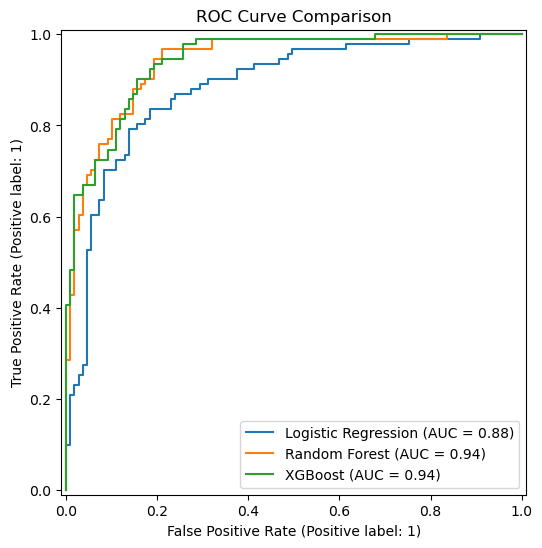

In [27]:
# Plot ROC curve for each model
fig, ax = plt.subplots(figsize=(6, 8))
RocCurveDisplay.from_estimator(logreg_n, X_test_scaled, y_test, ax=ax, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf_n, X_test_scaled, y_test, ax=ax, name="Random Forest")
RocCurveDisplay.from_estimator(xgb_n, X_test_scaled, y_test, ax=ax, name="XGBoost")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [28]:
metrics = {
    "Model": ['XGBoost', 'Random Forest', 'Logistic Regression'],
    "Accuracy": [xgb_accuracy_score_normalized, rf_accuracy_score_normalized, logreg_accuracy_score_normalized],
    "Precision": [xgb_precision_score_normalized, rf_precision_score_normalized, logreg_precision_score_normalized],
    "Recall": [xgb_recall_score_normalized, rf_recall_score_normalized, logreg_recall_score_normalized],
    "ROC AUC": [xgb_roc_auc_score_normalized, rf_roc_auc_score_normalized, logreg_roc_auc_score_normalized]
}

# Create DataFrame
df_metrics = pd.DataFrame(metrics)

# Display the table in a presentable way
pd.set_option('display.colheader_justify', 'center')  # Center-align column headers
df_metrics.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'blue'), ('color', 'white'), ('font-weight', 'bold')]},  # Header style
     {'selector': 'tbody td', 'props': [('text-align', 'center')]},  # Cell style
     {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '60%'), ('margin', '0 auto')]}]  # Table style
).hide(axis="index")


Model,Accuracy,Precision,Recall,ROC AUC
XGBoost,0.870000,0.828283,0.901099,0.872568
Random Forest,0.855000,0.810000,0.890110,0.857899
Logistic Regression,0.805000,0.754902,0.846154,0.808398


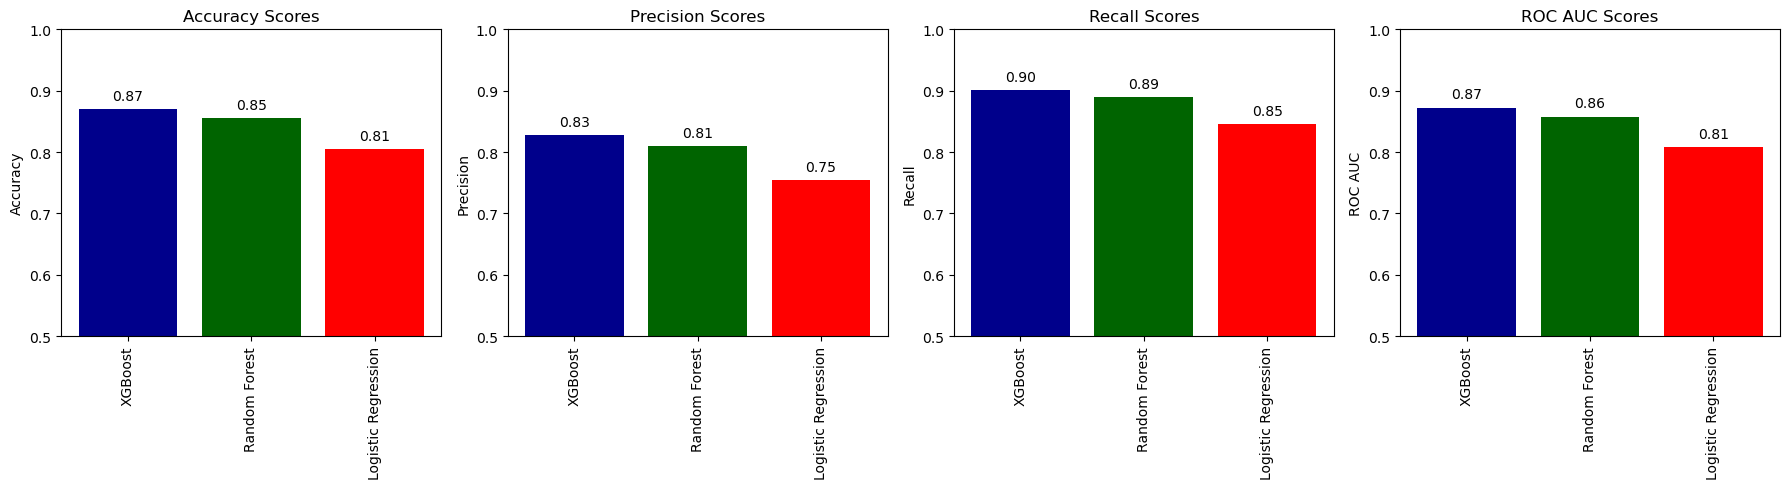

In [29]:
accuracy_scores = [xgb_accuracy_score_normalized, rf_accuracy_score_normalized, logreg_accuracy_score_normalized]
precision_scores = [xgb_precision_score_normalized, rf_precision_score_normalized, logreg_precision_score_normalized]
recall_scores = [xgb_recall_score_normalized, rf_recall_score_normalized, logreg_recall_score_normalized]
roc_auc_scores = [xgb_roc_auc_score_normalized, rf_roc_auc_score_normalized, logreg_roc_auc_score_normalized]

# Model names for the labels
model_names = ['XGBoost', 'Random Forest', 'Logistic Regression']

fig, axs = plt.subplots(1, 4, figsize=(18, 5))

# Accuracy histogram
axs[0].bar(model_names, accuracy_scores, color=['darkblue', 'darkgreen', 'red'])
axs[0].set_title('Accuracy Scores')
axs[0].set_ylabel('Accuracy')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_ylim(0.5, 1)  # Set y-axis range from 0.5 to 1
for i, value in enumerate(accuracy_scores):
    axs[0].text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Precision histogram
axs[1].bar(model_names, precision_scores, color=['darkblue', 'darkgreen', 'red'])
axs[1].set_title('Precision Scores')
axs[1].set_ylabel('Precision')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim(0.5, 1)  # Set y-axis range from 0.5 to 1
for i, value in enumerate(precision_scores):
    axs[1].text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Recall histogram
axs[2].bar(model_names, recall_scores, color=['darkblue', 'darkgreen', 'red'])
axs[2].set_title('Recall Scores')
axs[2].set_ylabel('Recall')
axs[2].tick_params(axis='x', rotation=90)
axs[2].set_ylim(0.5, 1)  # Set y-axis range from 0.5 to 1
for i, value in enumerate(recall_scores):
    axs[2].text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# ROC AUC histogram
axs[3].bar(model_names, roc_auc_scores, color=['darkblue', 'darkgreen', 'red'])
axs[3].set_title('ROC AUC Scores')
axs[3].set_ylabel('ROC AUC')
axs[3].tick_params(axis='x', rotation=90)
axs[3].set_ylim(0.5, 1)  # Set y-axis range from 0.5 to 1
for i, value in enumerate(roc_auc_scores):
    axs[3].text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


In [30]:
random_samples = X.sample(n=10, random_state=42)

# Make predictions using the trained models
xgb_predictions = xgb_n.predict(random_samples)
rf_predictions = rf_n.predict(random_samples)
logreg_predictions = logreg_n.predict(random_samples)

# Convert 1/0 predictions to "Will Churn" / "Will Not Churn"
xgb_predictions = ['Will Churn' if pred == 1 else 'Will Not Churn' for pred in xgb_predictions]
rf_predictions = ['Will Churn' if pred == 1 else 'Will Not Churn' for pred in rf_predictions]
logreg_predictions = ['Will Churn' if pred == 1 else 'Will Not Churn' for pred in logreg_predictions]

# Get the actual churn values for the random samples
actual_churn = y.loc[random_samples.index].apply(lambda x: 'Will Churn' if x == 1 else 'Will Not Churn')

# Combine the predictions into a DataFrame
predictions_df = pd.DataFrame({
    'Customer ID': random_samples.index,
    'Actual Churn': actual_churn,
    'XGBoost Prediction': xgb_predictions,
    'Random Forest Prediction': rf_predictions,
    'Logistic Regression Prediction': logreg_predictions
})

# Style the DataFrame
styled_df = predictions_df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', 'blue'), ('color', 'white'), ('font-weight', 'bold')]},  # Column header style
        {'selector': 'tbody td', 'props': [('text-align', 'center')]},  # Cell style
        {'selector': 'td:nth-child(1)', 'props': [('font-weight', 'bold')]},  # Make Customer ID bold
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},  # Table style
    ]
).hide(axis="index")


styled_df

c:\Users\ayush\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\ayush\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Customer ID,Actual Churn,XGBoost Prediction,Random Forest Prediction,Logistic Regression Prediction
118359,Will Not Churn,Will Not Churn,Will Not Churn,Will Not Churn
112199,Will Not Churn,Will Churn,Will Not Churn,Will Churn
32131,Will Churn,Will Churn,Will Churn,Will Not Churn
110442,Will Not Churn,Will Churn,Will Not Churn,Will Not Churn
71731,Will Not Churn,Will Not Churn,Will Not Churn,Will Not Churn
102796,Will Churn,Will Churn,Will Churn,Will Not Churn
60860,Will Churn,Will Not Churn,Will Churn,Will Churn
4472,Will Churn,Will Churn,Will Churn,Will Churn
116300,Will Churn,Will Churn,Will Churn,Will Not Churn
44575,Will Churn,Will Not Churn,Will Churn,Will Not Churn


In [31]:
# Function to display predictions for given customer IDs
def display_predictions_for_customer(customer_ids):
    # Check if the input is a single Customer ID or a list of IDs
    if isinstance(customer_ids, int):
        customer_ids = [customer_ids]

    # Make sure the customer IDs are valid
    if not all(id in X.index for id in customer_ids):
        print("Invalid Customer ID(s). Please check and try again.")
        return

    # Get the rows for the specified customer IDs
    customer_data = X.loc[customer_ids]

    # Make predictions using the trained models
    xgb_predictions = xgb_n.predict(customer_data)
    rf_predictions = rf_n.predict(customer_data)
    logreg_predictions = logreg_n.predict(customer_data)

    # Convert 1/0 predictions to "Will Churn" / "Will Not Churn"
    xgb_predictions = ['Will Churn' if pred == 1 else 'Will Not Churn' for pred in xgb_predictions]
    rf_predictions = ['Will Churn' if pred == 1 else 'Will Not Churn' for pred in rf_predictions]
    logreg_predictions = ['Will Churn' if pred == 1 else 'Will Not Churn' for pred in logreg_predictions]

    # Get the actual churn values for the selected customer IDs
    actual_churn = y.loc[customer_data.index].apply(lambda x: 'Will Churn' if x == 1 else 'Will Not Churn')

    # Combine the predictions into a DataFrame
    predictions_df = pd.DataFrame({
        'Customer ID': customer_data.index,
        'Actual Churn': actual_churn,
        'XGBoost Prediction': xgb_predictions,
        'Random Forest Prediction': rf_predictions,
        'Logistic Regression Prediction': logreg_predictions
    })

    # Style the DataFrame
    styled_df = predictions_df.style.set_table_styles(
        [
            {'selector': 'thead th', 'props': [('background-color', 'blue'), ('color', 'white'), ('font-weight', 'bold')]},  # Column header style
            {'selector': 'tbody td', 'props': [('text-align', 'center')]},  # Cell style
            {'selector': 'td:nth-child(1)', 'props': [('font-weight', 'bold')]},  # Make Customer ID bold
            {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},  # Table style
        ]
    ).hide(axis="index")  # Hide the index column

    # Display the styled DataFrame
    return styled_df

# Create text input widget for Customer ID(s)
customer_input_widget = widgets.Text(
    description='Customer IDs:',
    placeholder='Enter space-separated IDs',
    style={'description_width': 'initial'}
)

instruction_label = widgets.Label(
    value="Give CustomerID(s) separated by a single blank space\n(Values should be between 1 and 125000)"
)

# Create a button widget
button = widgets.Button(description="Show Prediction")

# Button click event handler
def on_button_click(b):
    # Get the customer IDs from the text input widget
    customer_input = customer_input_widget.value
    if customer_input:
        # Convert the input string into a list of integers by splitting based on spaces
        try:
            customer_ids = [int(id.strip()) for id in customer_input.split()]
            display(display_predictions_for_customer(customer_ids))
        except ValueError:
            print("Invalid input. Please enter a space-separated list of valid Customer IDs.")
    else:
        print("Please enter at least one Customer ID.")

# Link the button click event to the handler function
button.on_click(on_button_click)

# Display the widgets (instruction label, input field, and button)
display(instruction_label, customer_input_widget, button)


Label(value='Give CustomerID(s) separated by a single blank space\n(Values should be between 1 and 125000)')

Text(value='', description='Customer IDs:', placeholder='Enter space-separated IDs', style=DescriptionStyle(de…

Button(description='Show Prediction', style=ButtonStyle())